# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from collections import Counter
from datetime import date
from sklearn.impute import SimpleImputer

from config import get_default_config
config = get_default_config()
NUMERIC_FEATURES = config.NUMERIC_FEATURES
CATEGORICAL_FEATURES = config.CATEGORICAL_FEATURES

# Data Counts

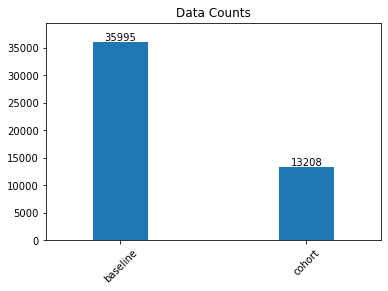

In [2]:
df_v1 = pd.read_csv('./data/raw/v2_df_baseline_filled_v1.csv')
df_co = pd.read_csv('./data/raw/cohort_codition1_yr5_se0.75.csv')

freqs = [len(df_v1), len(df_co)]
freq_series = pd.Series(freqs)
ax = freq_series.plot(kind='bar', ylim=[0, max(freqs)*1.1], width=0.3)

ax.set_title('Data Counts')
ax.set_xticklabels(['baseline', 'cohort'], rotation=45)

rects = ax.patches
for rect, freq in zip(rects, freqs):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 10, freq, ha="center", va="bottom")
plt.show()

# Nan Data Counts

Labling Data Count 13208
True Label Data Count 1345
Label Frequency 0.10183222289521503


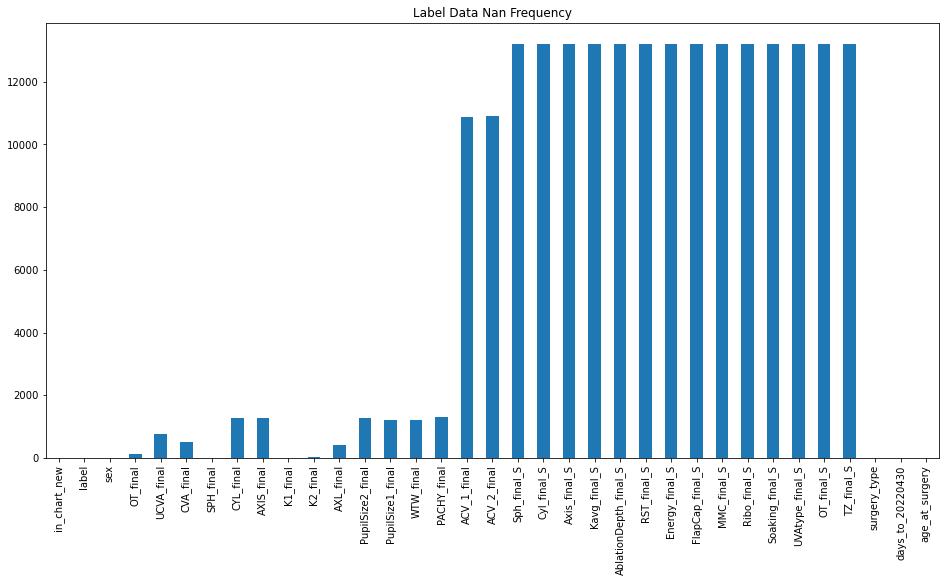

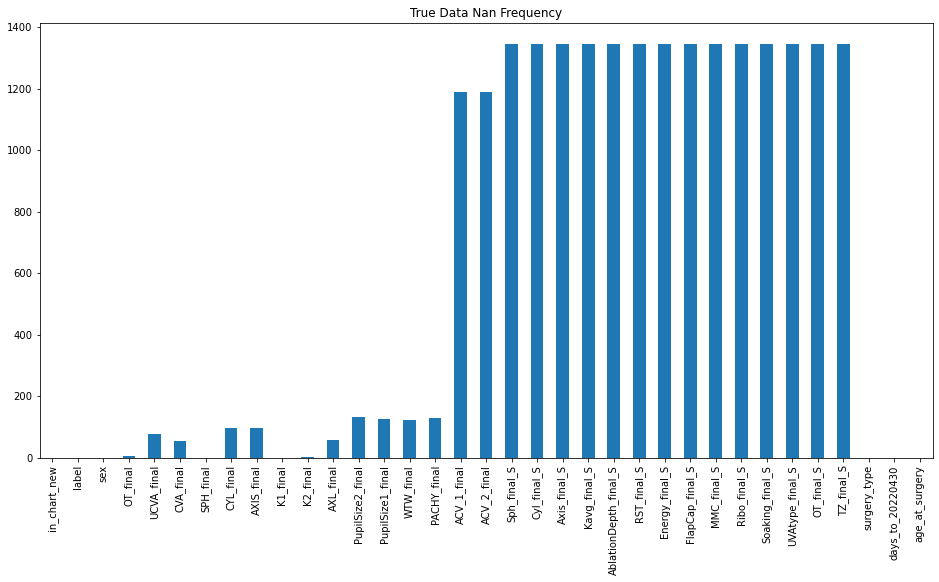

In [3]:
df_v1_join = df_v1[df_v1.in_chart_new.isin(df_co.in_chart_new)]
label_1_index = df_co['label'] == 1.

print('Labling Data Count', len(df_v1_join))
print('True Label Data Count', label_1_index.sum())
print('Label Frequency', label_1_index.sum() / len(df_v1_join))

# plot
df_co.isna().sum().plot(kind='bar', title='Label Data Nan Frequency', figsize=(16, 8))
plt.show()
df_co[label_1_index].isna().sum().plot(kind='bar', title='True Data Nan Frequency', figsize=(16, 8))
plt.show()
#

numeric_df = df_co[['in_chart_new'] + NUMERIC_FEATURES]
categorical_df = df_co[['in_chart_new'] + CATEGORICAL_FEATURES]
surgery_df = df_v1_join[['in_chart_new', 'date_surgery']].copy()
surgery_df.date_surgery = surgery_df.date_surgery.apply(lambda x: date.fromisoformat(x))
label_df = df_co[['in_chart_new', 'label']]

# 

# Numeric Data

## Box Plots

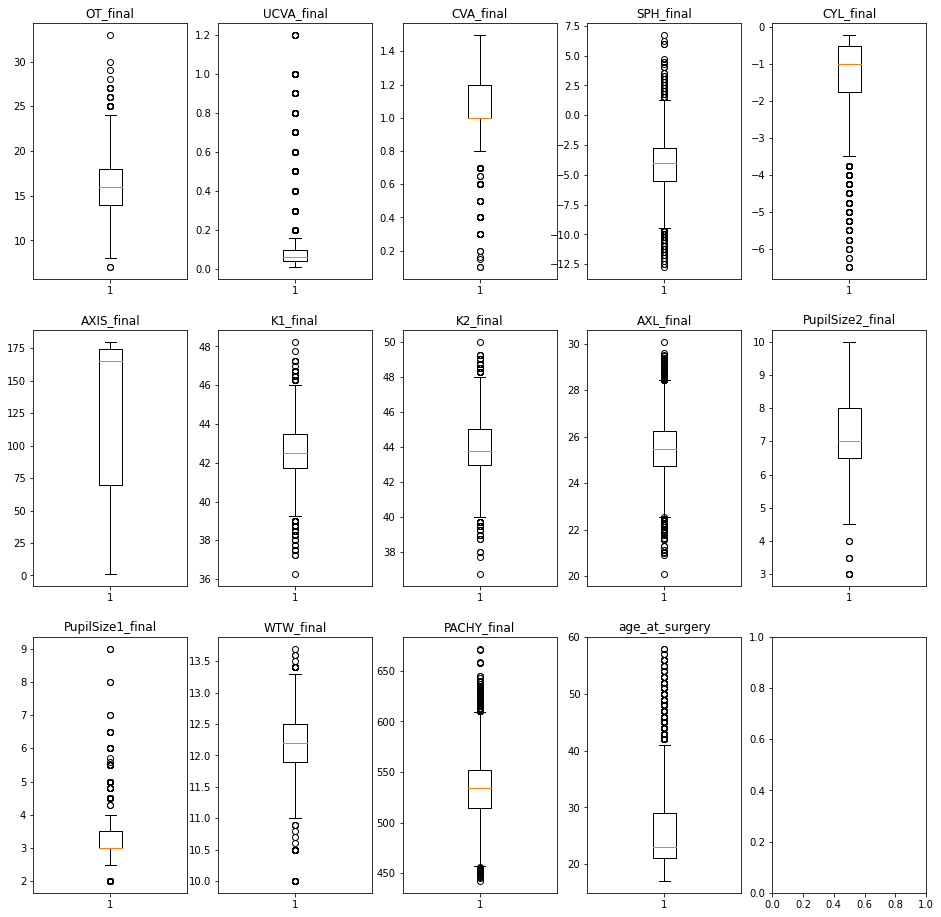

In [4]:
n_row, n_col = (3, 5); row, col = (0, 0)
fig, axes = plt.subplots(n_row, n_col, figsize=(16,16))


for column in numeric_df.columns[1:]:
    axes[row, col].boxplot(numeric_df[column].dropna().to_numpy())
    axes[row, col].set_title(column)
    col += 1
    if col % n_col == 0:
        col = 0; row += 1
plt.show()

## Skew, Kurt

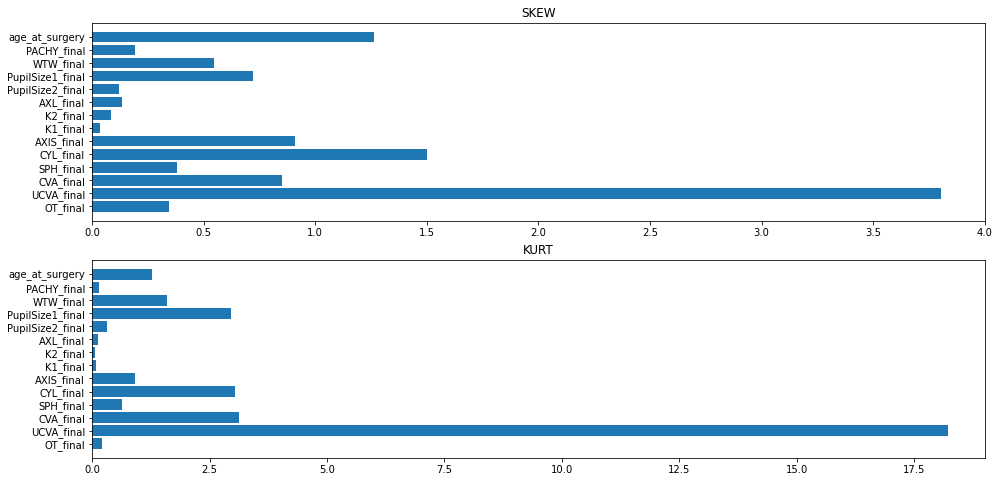

In [5]:
# plot
skew = numeric_df.skew(numeric_only=True).to_numpy()
kurt = numeric_df.kurt(numeric_only=True).to_numpy()

y_pos = np.arange(len(numeric_df.columns[1:]))
fig, axes = plt.subplots(2, 1, figsize=(16,8))
axes[0].barh(y_pos, np.abs(skew))
axes[0].set_yticks(y_pos, numeric_df.columns[1:])
axes[0].set_title('SKEW')
axes[0].set_xlim(0, 4)

axes[1].barh(y_pos, np.abs(kurt))
axes[1].set_yticks(y_pos, numeric_df.columns[1:])
axes[1].set_title('KURT')
axes[1].set_xlim(0, 19)

plt.show()
#

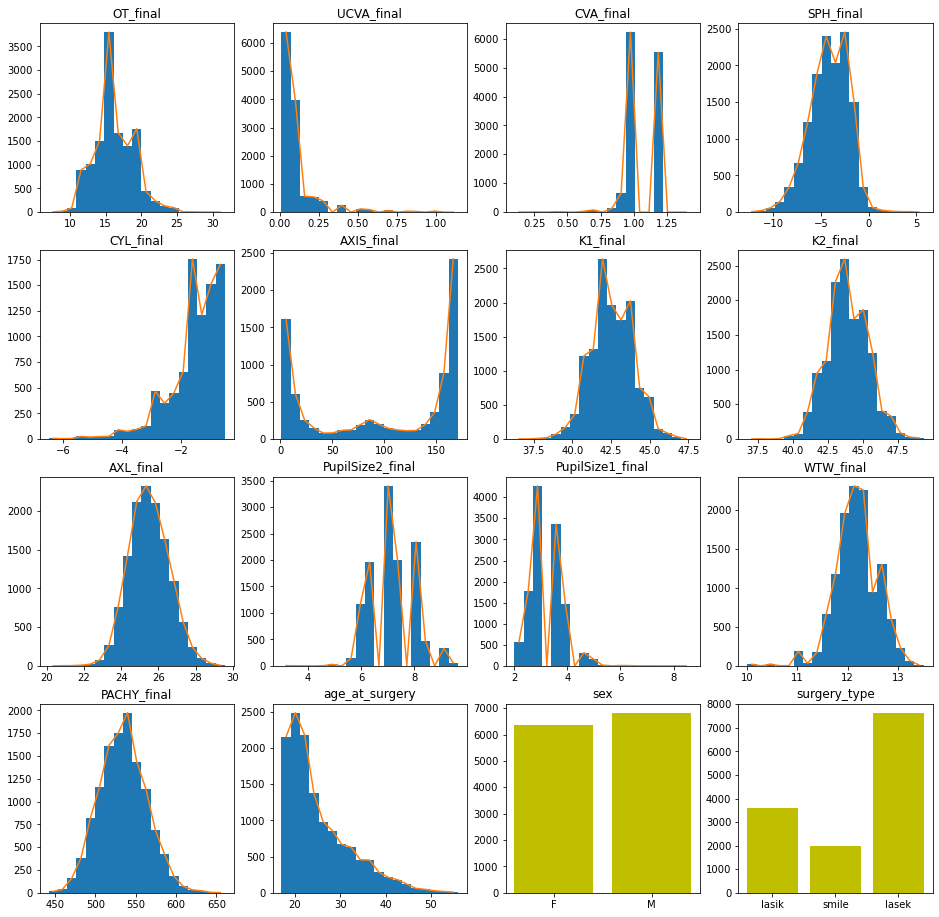

In [6]:
n_row, n_col = (4, 4); row, col = (0, 0)

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for column in numeric_df.columns[1:]:
    numeric_data = numeric_df[column].dropna().to_numpy()
    max_value, min_value = max(numeric_data), min(numeric_data)
    bins = np.arange(min_value, max_value, (max_value-min_value)/20)

    hist = axes[row, col].hist(numeric_data, bins)

    x = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]
    axes[row, col].plot(x, hist[0])
    axes[row, col].set_title(column)
    col += 1
    if col % n_col == 0:
        col = 0; row += 1

for column in categorical_df.columns[1:]:
    counter = Counter(categorical_df[column])
    axes[row, col].bar(list(counter.keys()), list(counter.values()), color='y')
    axes[row, col].set_title(column)
    col += 1
    if col % n_col == 0:
        col = 0; row += 1

plt.show()

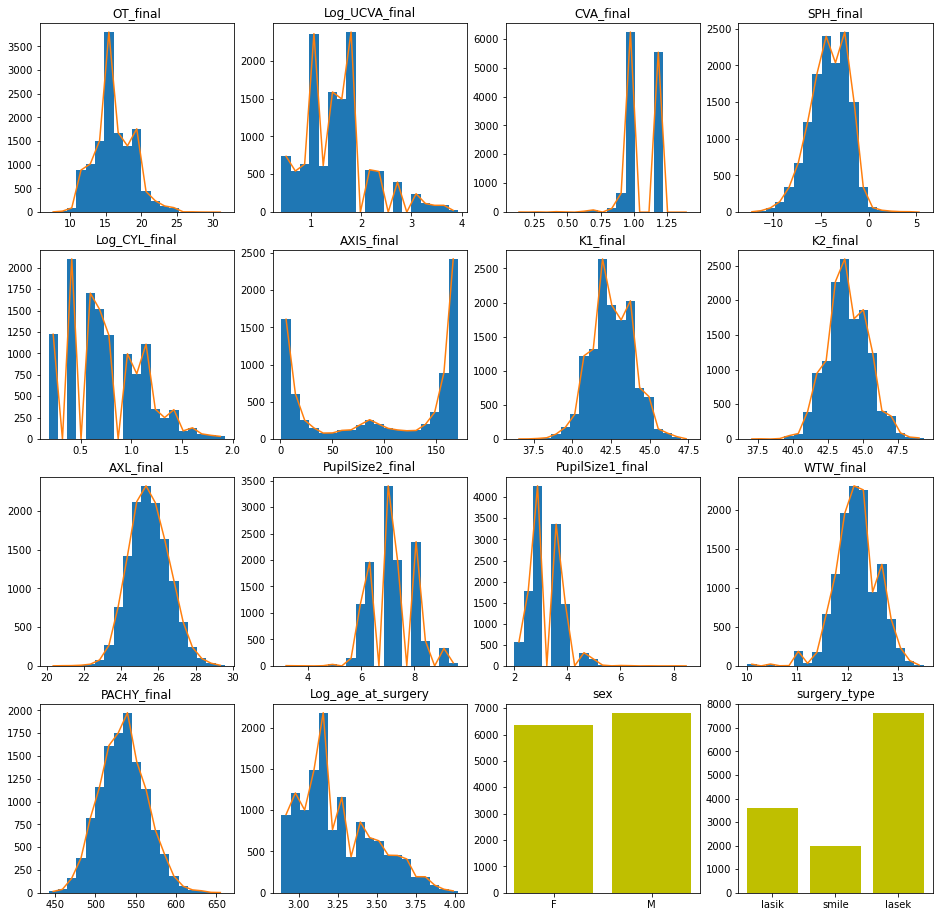

In [7]:
n_row, n_col = (4, 4); row, col = (0, 0)

fig, axes = plt.subplots(n_row, n_col, figsize=(16,16))

log_columns = ['UCVA_final',
               'CYL_final',
               'age_at_surgery']

log_numeric_df = numeric_df.copy()
log_numeric_df['CYL_final'] = numeric_df['CYL_final'].apply(lambda x: np.log1p(np.abs(x)))
log_numeric_df['age_at_surgery'] = numeric_df['age_at_surgery'].apply(lambda x: np.log1p(x))
log_numeric_df['UCVA_final'] = numeric_df['UCVA_final'].apply(lambda x: np.log1p(x*50))

for column in log_numeric_df.columns[1:]:
    numeric_data = log_numeric_df[column].dropna().to_numpy()
    if column in log_columns:
        axes[row, col].set_title('Log_'+ column)
    else:
        axes[row, col].set_title(column)

    max_value, min_value = max(numeric_data), min(numeric_data)
    bins = np.arange(min_value, max_value, (max_value-min_value)/20)

    hist = axes[row, col].hist(numeric_data, bins)

    x = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]
    axes[row, col].plot(x, hist[0])
    col += 1
    if col % n_col == 0:
        col = 0; row += 1

for column in categorical_df.columns[1:]:
    counter = Counter(categorical_df[column])
    axes[row, col].bar(list(counter.keys()), list(counter.values()), color='y')
    axes[row, col].set_title(column)
    col += 1
    if col % n_col == 0:
        col = 0; row += 1

plt.show()

# 

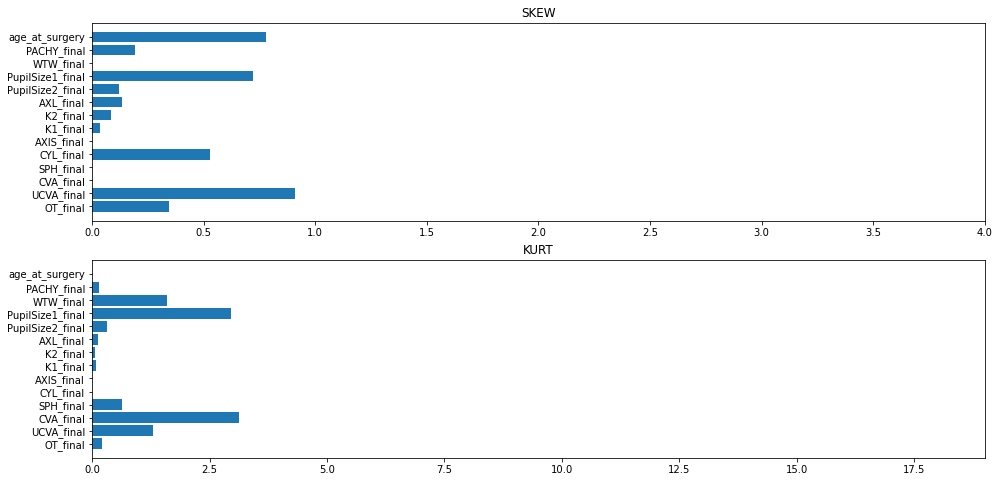

In [8]:
# plot
skew = log_numeric_df.skew(numeric_only=True).to_numpy()
kurt = log_numeric_df.kurt(numeric_only=True).to_numpy()

y_pos = np.arange(len(log_numeric_df.columns[1:]))
fig, axes = plt.subplots(2, 1, figsize=(16,8))
axes[0].barh(y_pos, skew)
axes[0].set_yticks(y_pos, log_numeric_df.columns[1:])
axes[0].set_title('SKEW')
axes[0].set_xlim(0, 4)

axes[1].barh(y_pos, kurt)
axes[1].set_yticks(y_pos, log_numeric_df.columns[1:])
axes[1].set_title('KURT')
axes[1].set_xlim(0, 19)
plt.show()
#

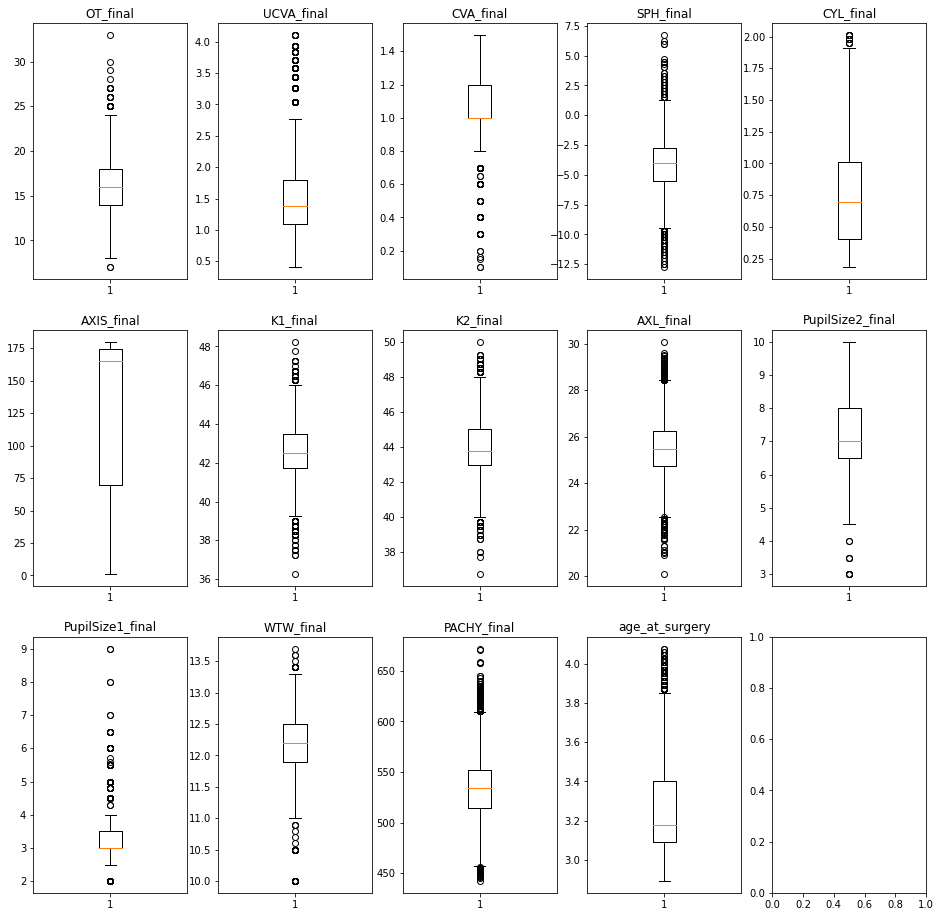

In [9]:
n_row, n_col = (3, 5); row, col = (0, 0)
fig, axes = plt.subplots(n_row, n_col, figsize=(16,16))


for column in log_numeric_df.columns[1:]:
    axes[row, col].boxplot(log_numeric_df[column].dropna().to_numpy())
    axes[row, col].set_title(column)
    col += 1
    if col % n_col == 0:
        col = 0; row += 1
plt.show()

## Impute

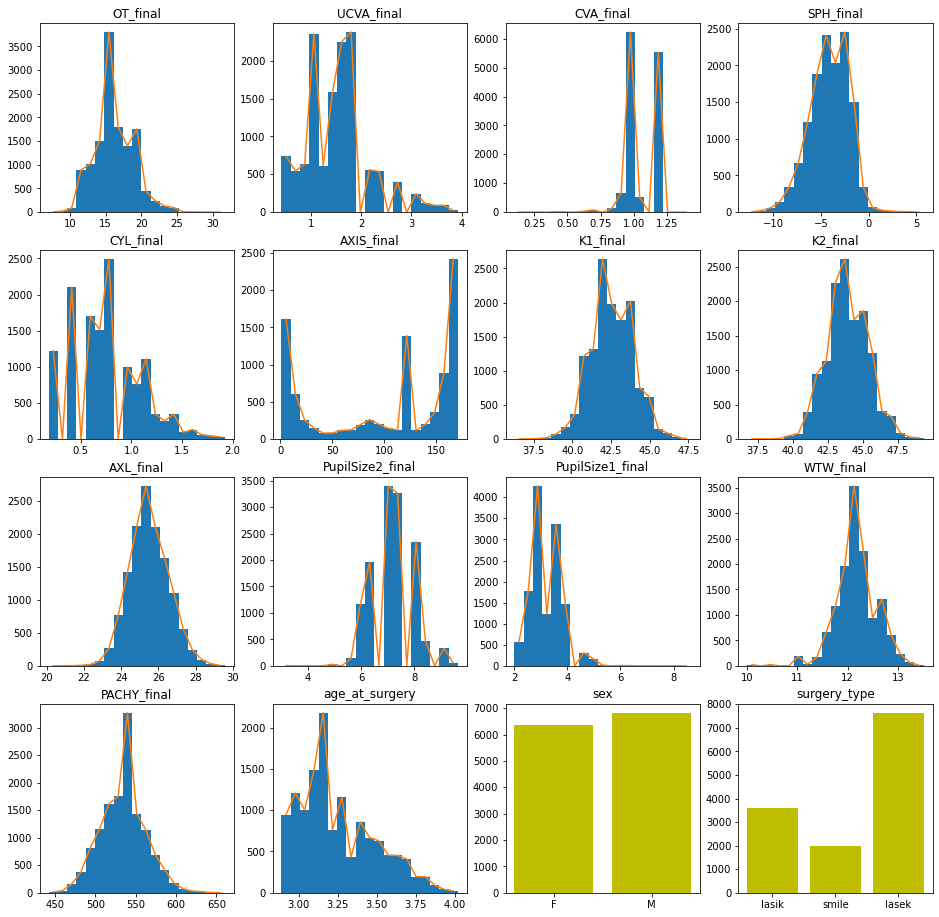

In [10]:
num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
log_numeric_df[log_numeric_df.columns[1:]] = num_imputer.fit_transform(log_numeric_df[log_numeric_df.columns[1:]])

n_row, n_col = (4, 4); row, col = (0, 0)

fig, axes = plt.subplots(n_row, n_col, figsize=(16,16))
for column in log_numeric_df.columns[1:]:
    numeric_data = log_numeric_df[column].to_numpy()
    axes[row, col].set_title(column)
    max_value, min_value = max(numeric_data), min(numeric_data)
    bins = np.arange(min_value, max_value, (max_value-min_value)/20)

    hist = axes[row, col].hist(numeric_data, bins)

    x = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]
    axes[row, col].plot(x, hist[0])
    col += 1
    if col % n_col == 0:
        col = 0; row += 1

for column in categorical_df.columns[1:]:
    counter = Counter(categorical_df[column])
    axes[row, col].bar(list(counter.keys()), list(counter.values()), color='y')
    axes[row, col].set_title(column)
    col += 1
    if col % n_col == 0:
        col = 0; row += 1

plt.show()

# Categorical Data

In [11]:
ohe_cat_df = pd.get_dummies(categorical_df, columns=['sex', 'surgery_type'])
ohe_cat_df

,in_chart_new,sex_F,sex_M,surgery_type_lasek,surgery_type_lasik,surgery_type_smile
0,100555L,1,0,0,1,0
1,100555R,1,0,0,1,0
2,100583L,0,1,0,0,1
3,100583R,0,1,0,0,1
4,101864L,1,0,1,0,0
...,...,...,...,...,...,...
13203,89964R,0,1,1,0,0
13204,90237L,1,0,1,0,0
13205,90237R,1,0,1,0,0
13206,96775L,1,0,0,1,0


# Image

In [12]:
from glob import glob 

img_path_L = glob('./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/*/*')
img_path_R = glob('./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/*/*')
extentions = []
for p in img_path_R+img_path_L:
    if p.split('.')[-1] not in extentions:
        extentions.append(p.split('.')[-1])

print(len(img_path_L), len(img_path_R))
print(*extentions)

31515 31522
jpg


In [13]:
df = pd.DataFrame(columns=['in_chart_new', 'image_date', 'image_path'])


def path_split(path, kind):
    splited_path = path.split('/')
    in_chart_new = str(int(splited_path[-2])*7)+kind
    year, month, day = int(splited_path[-1][:4]), int(splited_path[-1][4:6]), int(splited_path[-1][6:8])
    date_surgery = date(year, month, day)
    return in_chart_new, date_surgery, path
df[['in_chart_new', 'image_date', 'image_path']] = [path_split(path, 'L') for path in img_path_L] + [path_split(path, 'R') for path in img_path_R]
df

,in_chart_new,image_date,image_path
0,467796L,2015-05-16,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...
1,467796L,2016-07-08,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...
2,467796L,2014-04-10,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...
3,462098L,2014-02-26,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...
4,459837L,2014-02-14,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...
...,...,...,...
63032,560784R,2016-02-12,./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/...
63033,560784R,2016-02-06,./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/...
63034,560784R,2016-03-05,./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/...
63035,672539R,2019-01-15,./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/...


In [14]:
image_path_data = []
for in_chart_new, row in pd.merge(df, surgery_df, on='in_chart_new').groupby('in_chart_new'):
    max_date = date(1000, 1, 1)
    for _, image_date, image_path, date_surgery in row.values:
        if image_date < date_surgery and max_date < image_date:
            max_date = image_date 
    image_path_data.append([in_chart_new, max_date, image_path, date_surgery])
image_df = pd.DataFrame(image_path_data, columns=['in_chart_new', 'image_date', 'image_path', 'date_surgery'])
image_df

,in_chart_new,image_date,image_path,date_surgery
0,100555L,2014-01-28,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...,2014-01-29
1,100555R,2014-01-28,./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/...,2014-01-29
2,100583L,2016-12-30,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...,2016-12-31
3,100583R,2016-12-30,./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/...,2016-12-31
4,101864L,2016-03-16,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...,2016-03-17
...,...,...,...,...
13194,89964R,2014-09-24,./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/...,2014-10-15
13195,90237L,2014-01-20,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...,2014-01-22
13196,90237R,2014-01-20,./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/...,2014-01-22
13197,96775L,1000-01-01,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...,2015-10-09


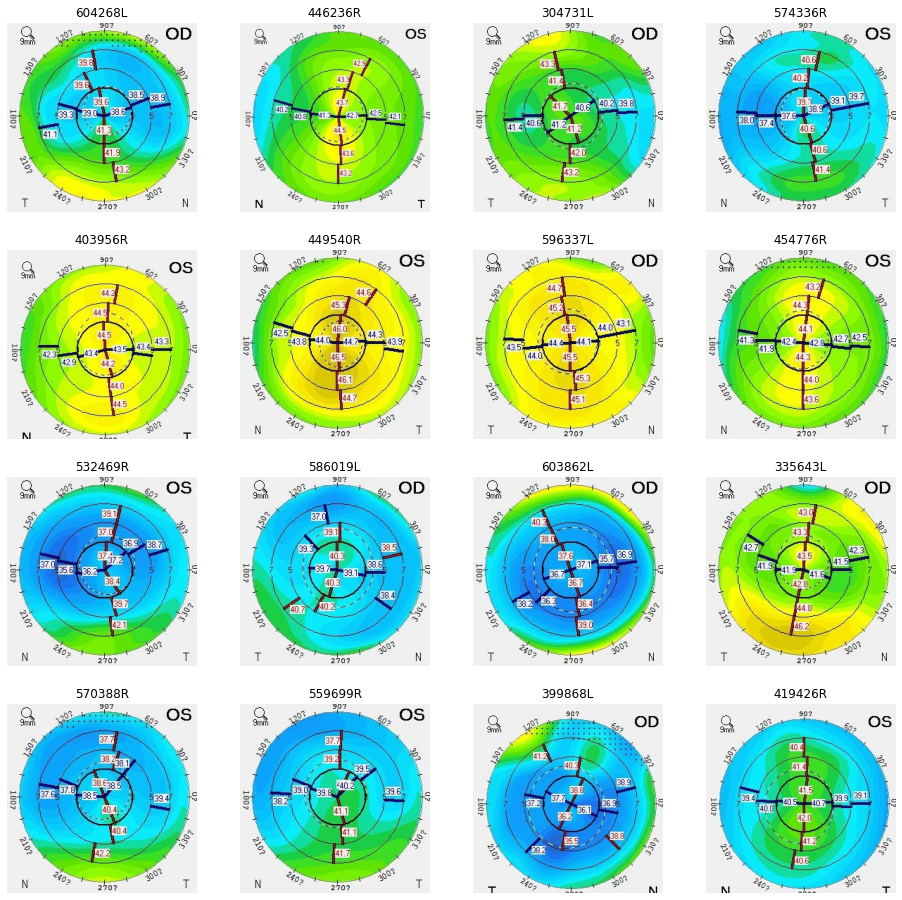

In [15]:
n_row, n_col = (4, 4); row = 0; col = 0
fig, axes = plt.subplots(n_row, n_col, figsize=(16, 16))

for in_chart_new, path in image_df[['in_chart_new', 'image_path']].sample(16).values:
    axes[row][col].imshow(imread(path))
    axes[row][col].axis('off')
    axes[row][col].set_title(in_chart_new)
    col += 1
    if col % n_col == 0:
        row += 1
        col = 0
    
plt.show()

In [16]:
feature_df = pd.merge(log_numeric_df, ohe_cat_df, on='in_chart_new')
final_df = pd.merge(label_df, pd.merge(feature_df, image_df, on='in_chart_new'), on='in_chart_new')
final_df.to_csv('./data/preprocessed_cohort_2.csv', index=False)
final_df = pd.read_csv('./data/preprocessed_cohort_2.csv')
final_df

,in_chart_new,label,OT_final,UCVA_final,CVA_final,SPH_final,CYL_final,AXIS_final,K1_final,K2_final,...,PACHY_final,age_at_surgery,sex_F,sex_M,surgery_type_lasek,surgery_type_lasik,surgery_type_smile,image_date,image_path,date_surgery
0,100555L,0.0,17.0,3.828641,1.2,-0.75,0.810930,167.000000,44.00,45.75,...,534.0,3.135494,1,0,0,1,0,2014-01-28,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...,2014-01-29
1,100555R,0.0,18.0,3.258097,1.2,-1.75,0.746078,123.826389,44.50,45.25,...,528.0,3.135494,1,0,0,1,0,2014-01-28,./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/...,2014-01-29
2,100583L,0.0,19.0,1.098612,1.0,-5.75,0.746078,123.826389,39.75,40.00,...,541.0,2.995732,0,1,0,0,1,2016-12-30,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...,2016-12-31
3,100583R,0.0,21.0,1.098612,1.0,-6.25,0.223144,1.000000,39.75,40.00,...,539.0,2.995732,0,1,0,0,1,2016-12-30,./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/...,2016-12-31
4,101864L,1.0,17.0,0.405465,0.8,-9.75,0.916291,5.000000,43.00,44.50,...,513.0,3.218876,1,0,1,0,0,2016-03-16,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...,2016-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,89964R,0.0,19.0,0.405465,1.0,-9.75,0.559616,155.000000,42.50,43.25,...,562.0,3.091042,0,1,1,0,0,2014-09-24,./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/...,2014-10-15
13195,90237L,1.0,16.0,1.386294,1.2,-5.00,0.559616,165.000000,43.50,44.50,...,506.0,3.218876,1,0,1,0,0,2014-01-20,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...,2014-01-22
13196,90237R,0.0,12.0,1.609438,1.2,-3.75,0.693147,17.000000,43.75,44.75,...,504.0,3.218876,1,0,1,0,0,2014-01-20,./data/image/cohort_v2/topo_cohort_2/B_Sag_OS/...,2014-01-22
13197,96775L,0.0,15.0,1.791759,1.0,-2.25,0.559616,74.000000,41.50,42.00,...,520.0,3.713572,1,0,0,1,0,1000-01-01,./data/image/cohort_v2/topo_cohort_2/B_Sag_OD/...,2015-10-09
